In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data & Pre-process

In [327]:
policy_data = pd.read_csv('policylab_pretest_policy_100.csv')

#Store the top two columns in a dictionary (contains the actual questions associated with each colname)
questions = policy_data.iloc[0:2]
questions.index = ['title','choices']
questions = questions.to_dict()

#Reformat remaining data
policy_data = policy_data.loc[2:] #Include only actual data in the columns 
policy_data.index = range(len(policy_data)) #Reset Index
policy_data.columns = [string.lower() for string in policy_data.columns] #Lowercase all columns (makes loops easier)

#Remove all people who have not finished or have NaN's in all of their rows.
policy_data[policy_data['finished'] == 'True']
policy_data = policy_data.fillna(0)
policy_data = policy_data[policy_data['p1support'] != 0] #filtering out NaN is based on p1


#Filter out rows where avg time per answer is between 1 std of the mean
time_cols = ['p' + str(q) + 'time_page submit' for q in range(1,51)]
for i,col in enumerate(time_cols):
    policy_data[col] = policy_data[col].apply(lambda x: float(x))
    if i == 0:
        policy_data['avg_time'] = policy_data[col]
    else:
        policy_data['avg_time'] = policy_data['avg_time'] + policy_data[col]
policy_data['avg_time'] = policy_data['avg_time'] / len(policy_data)

#Filter out people > +/- 1 std dev of mean time spent on each question (NOTE: MUTUALLY EXCLUSIVE WITH 15 FASTEST PEOPLE FILTER)
time_mean = np.mean(policy_data['avg_time'])
time_std = np.std(policy_data['avg_time'])
policy_data = policy_data[(policy_data['avg_time'] >= time_mean - time_std) & (policy_data['avg_time'] <= time_mean + time_std)]

#Filter out 15 fastest responders (NOTE: MUTUALLY EXCLUSIVE WITH MEAN +/- 1 STD FEATURE)
#policy_data = policy_data.sort_values('avg_time', ascending=False).head(86)

#Filter for people who got the Gotcha question correct
policy_data = policy_data[policy_data['gotcha'] == 'Support']

#Filter for policy columns & id columns only
response_cols = ['p' + str(q) + 'support' for q in range(1,51)]
policy_data = policy_data[['id','polid'] + response_cols]

#Filter out rows where ID's don't begin with 'A'
policy_data = policy_data[policy_data['id'].apply(lambda x: True if x[0] == 'A' else False)]

print(policy_data.shape)
policy_data

(68, 52)


,id,polid,p1support,p2support,p3support,p4support,p5support,p6support,p7support,p8support,...,p41support,p42support,p43support,p44support,p45support,p46support,p47support,p48support,p49support,p50support
34,AEPHQ3XYCQ0CG,Democrat,Neither support nor oppose,Somewhat support,Somewhat support,Support,Neither support nor oppose,Neither support nor oppose,Somewhat support,Neither support nor oppose,...,Support,Neither support nor oppose,Neither support nor oppose,Neither support nor oppose,Somewhat support,Neither support nor oppose,Oppose,Somewhat oppose,Support,Somewhat support
66,A2LI0QVPKA5CG8,Republican,Somewhat support,Somewhat support,Somewhat support,Neither support nor oppose,Neither support nor oppose,Neither support nor oppose,Neither support nor oppose,Strongly oppose,...,Somewhat support,Strongly oppose,Somewhat support,Somewhat support,Somewhat support,Oppose,Oppose,Strongly oppose,Neither support nor oppose,Support
68,A2XS5QI4YX493N,Lean Republican,Strongly oppose,Strongly support,Strongly support,Support,Strongly oppose,Strongly support,Strongly support,Somewhat support,...,Strongly support,Strongly support,Strongly support,Somewhat support,Somewhat oppose,Oppose,Support,Support,Strongly support,Somewhat support
15,A2ZDK0Y5466BXN,Lean Democratic,Somewhat support,Support,Somewhat support,Somewhat support,Neither support nor oppose,Neither support nor oppose,Neither support nor oppose,Somewhat support,...,Strongly support,Support,Strongly support,Support,Support,Neither support nor oppose,Somewhat oppose,Strongly support,Support,Somewhat oppose
35,A1AA0WXXEHPM3V,Democrat,Oppose,Somewhat support,Support,Somewhat support,Somewhat support,Somewhat oppose,Somewhat oppose,Somewhat support,...,Somewhat support,Support,Support,Neither support nor oppose,Somewhat oppose,Neither support nor oppose,Somewhat oppose,Support,Strongly support,Support
49,A2SKXKH9YXZYRI,Democrat,Strongly oppose,Somewhat oppose,Strongly oppose,Somewhat oppose,Neither support nor oppose,Strongly oppose,Somewhat support,Strongly support,...,Support,Support,Strongly support,Strongly support,Somewhat oppose,Somewhat support,Strongly oppose,Strongly oppose,Strongly support,Strongly support
84,A2YUCJ28XANFOX,Republican,Somewhat support,Somewhat support,Somewhat support,Support,Neither support nor oppose,Strongly oppose,Strongly oppose,Neither support nor oppose,...,Neither support nor oppose,Somewhat oppose,Strongly support,Oppose,Somewhat oppose,Somewhat oppose,Neither support nor oppose,Support,Somewhat support,Neither support nor oppose
81,A1J8TVICSRC70W,Lean Democratic,Strongly oppose,Oppose,Oppose,Oppose,Neither support nor oppose,Strongly oppose,Somewhat oppose,Somewhat support,...,Somewhat oppose,Oppose,Somewhat support,Support,Somewhat support,Strongly support,Oppose,Strongly oppose,Strongly support,Somewhat support
83,A35K3YVCX1LVPE,Democrat,Oppose,Support,Strongly support,Support,Neither support nor oppose,Oppose,Support,Oppose,...,Support,Neither support nor oppose,Strongly support,Support,Support,Support,Oppose,Neither support nor oppose,Strongly support,Neither support nor oppose
97,A1DBPM1UHEP4MU,Democrat,Strongly oppose,Oppose,Support,Somewhat support,Strongly support,Somewhat oppose,Strongly support,Strongly support,...,Somewhat support,Strongly support,Strongly support,Strongly support,Strongly support,Somewhat oppose,Somewhat oppose,Somewhat support,Support,Strongly support


In [328]:
#Get party without ideology
policy_data['ptyid'] = policy_data['polid'].apply(lambda x: 'r' if 'Republican' in x else ('d' if 'Democrat' in x else 'o'))

#Turn everything into likert scales
policy_data['polid'] = policy_data['polid'].map({'Republican':-2, 'Lean Republican': -1, 
                              'Independent/Other/Neither':0,
                              'Lean Democratic':1, 'Democrat':2})

for col in (response_cols):
    policy_data[col] = policy_data[col].map({'Strongly oppose':-3, 'Oppose':-2, 'Somewhat oppose': -1, 
                                            'Neither support nor oppose':0,
                                            'Somewhat support': 1, 'Support': 2, 'Strongly support': 3})


policy_data.head()

,id,polid,p1support,p2support,p3support,p4support,p5support,p6support,p7support,p8support,...,p42support,p43support,p44support,p45support,p46support,p47support,p48support,p49support,p50support,ptyid
34,AEPHQ3XYCQ0CG,2,0,1,1,2,0,0,1,0,...,0,0,0,1,0,-2,-1,2,1,d
66,A2LI0QVPKA5CG8,-2,1,1,1,0,0,0,0,-3,...,-3,1,1,1,-2,-2,-3,0,2,r
68,A2XS5QI4YX493N,-1,-3,3,3,2,-3,3,3,1,...,3,3,1,-1,-2,2,2,3,1,r
15,A2ZDK0Y5466BXN,1,1,2,1,1,0,0,0,1,...,2,3,2,2,0,-1,3,2,-1,d
35,A1AA0WXXEHPM3V,2,-2,1,2,1,1,-1,-1,1,...,2,2,0,-1,0,-1,2,3,2,d


## Get Means of both Parties & Combined for each item

In [332]:
#Isolate Republican & Democrat Data
r_data = policy_data[policy_data['ptyid'] == 'r']
d_data = policy_data[policy_data['ptyid'] == 'd']

#Get Means and STD's by party/combined
party_means = pd.DataFrame((policy_data.mean()).rename('all')).join(
                            (r_data.mean()).rename('rep')).join(
                            (d_data.mean()).rename('dem'))

party_std = pd.DataFrame((policy_data.std()).rename('all')).join(
                            (r_data.std()).rename('rep')).join(
                            (d_data.std()).rename('dem'))
         
party_means

,all,rep,dem
polid,0.367647,-1.586207,1.820513
p1support,-0.955882,-0.517241,-1.282051
p2support,1.000000,1.517241,0.615385
p3support,0.750000,0.586207,0.871795
p4support,1.220588,0.965517,1.410256
p5support,0.852941,0.310345,1.256410
p6support,-0.117647,-0.241379,-0.025641
p7support,0.691176,-0.103448,1.282051
p8support,0.735294,0.172414,1.153846
p9support,0.573529,0.068966,0.948718


/Users/ctt45/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


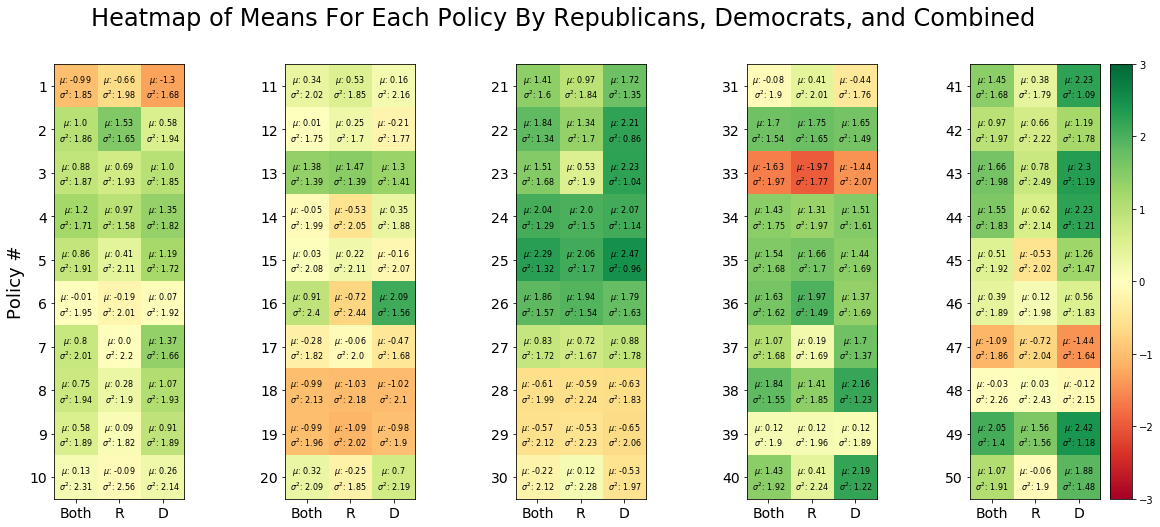

In [133]:
#Generate Heatmap of each policy by party/combined & mean/std 
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
fig.set_size_inches(20,8)

ax1.imshow(party_means.iloc[1:11],cmap='RdYlGn',vmin=-3, vmax=3)
ax2.imshow(party_means.iloc[11:21],cmap='RdYlGn',vmin=-3, vmax=3)
ax3.imshow(party_means.iloc[21:31],cmap='RdYlGn',vmin=-3, vmax=3)
ax4.imshow(party_means.iloc[31:41],cmap='RdYlGn',vmin=-3, vmax=3)
hm=ax5.imshow(party_means.iloc[41:51],cmap='RdYlGn',vmin=-3, vmax=3)

for cnt,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(np.arange(10*cnt+1,11+(10*cnt+1)), size=14)
    ax.set_xticklabels(['','Both','R','D'], size=14)

    
ax1.set_ylabel('Policy #',size=18)
#hm.set_clim(vmin=-3, vmax=3)
fig.colorbar(hm, orientation='vertical')
fig.suptitle('Heatmap of Means For Each Policy By Republicans, Democrats, and Combined\n', size=24)

for axnum,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    labels = party_means.iloc[10*axnum+1:10+(10*axnum+1)]
    for j,idx in enumerate(labels.index):
        for i,col in enumerate(labels.columns):
            #text = round(labels.loc[idx,col],2)           
            text = '$\mu$: '  + str(round(labels.loc[idx,col],2)) + '\n'
            text = text + '$\sigma^2$: ' + str(round(party_std.loc[idx,col],2))
            ax.text(i, j, text, ha="center", va="center", color="k", size=8)


fig.show()
fig.savefig('policy_party_meanstd_visual.png', dpi=600)

# Get Correlations of between ideology & policy items

In [134]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#Generate 
coor_data = pd.DataFrame([pearsonr(policy_data['polid'],policy_data[col])[0] for col in response_cols],
                                 columns=['pearsonr'])
coor_data = coor_data.join(pd.DataFrame([spearmanr(policy_data['polid'],policy_data[col])[0] for col in response_cols],
                                 columns=['spearmanr']))

coor_data.index = response_cols
coor_data.head()

,pearsonr,spearmanr
p1support,-0.193397,-0.155293
p2support,-0.244651,-0.222935
p3support,0.100456,0.118974
p4support,0.096792,0.129387
p5support,0.194309,0.161463


/Users/ctt45/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


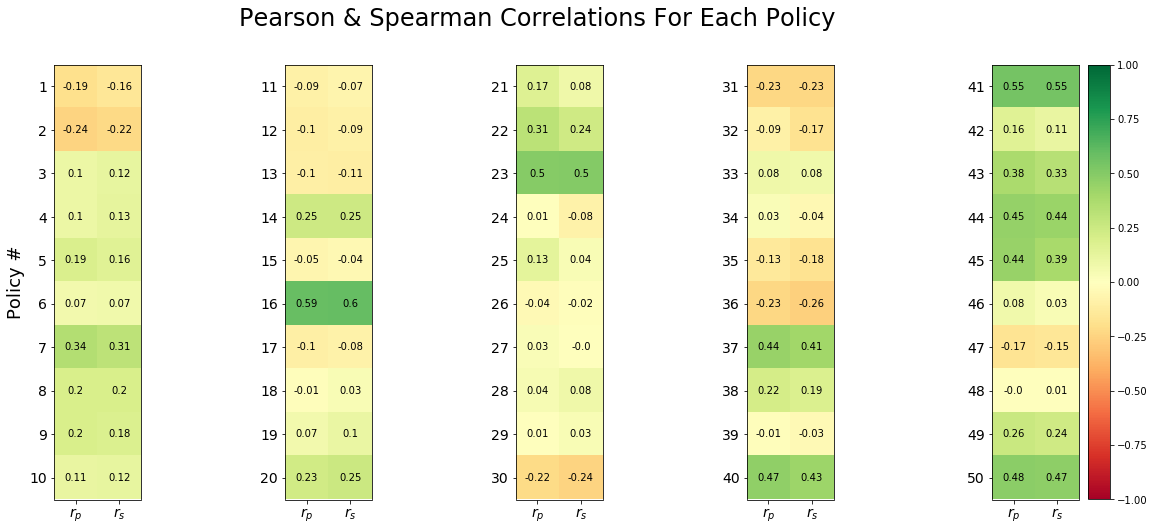

In [135]:
#Generate Heatmap of each policy by correlation with party

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
fig.set_size_inches(20,8)

ax1.imshow(coor_data.iloc[0:10],cmap='RdYlGn',vmin=-1, vmax=1)
ax2.imshow(coor_data.iloc[10:20],cmap='RdYlGn',vmin=-1, vmax=1)
ax3.imshow(coor_data.iloc[20:30],cmap='RdYlGn',vmin=-1, vmax=1)
ax4.imshow(coor_data.iloc[30:40],cmap='RdYlGn',vmin=-1, vmax=1)
hm=ax5.imshow(coor_data.iloc[40:50],cmap='RdYlGn',vmin=-1, vmax=1)

for cnt,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(np.arange(10*cnt+1,11+(10*cnt+1)), size=14)
    ax.set_xticklabels(['','$r_p$', '$r_s$'], size=14)

ax1.set_ylabel('Policy #',size=18)
#hm.set_clim(vmin=-3, vmax=3)
fig.colorbar(hm, orientation='vertical')
fig.suptitle('Pearson & Spearman Correlations For Each Policy \n', size=24)

for axnum,ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    labels = coor_data.iloc[10*axnum:10+(10*axnum)]
    for j,idx in enumerate(labels.index):
        for i,col in enumerate(labels.columns):
            #text = round(labels.loc[idx,col],2)           
            text = round(labels.loc[idx,col],2)
            ax.text(i, j, text, ha="center", va="center", color="k")

fig.show()
fig.savefig('policy_party_rvalues_visual.png', dpi=600)

# Build a Histogram of each Policy by party

KeyboardInterrupt: 

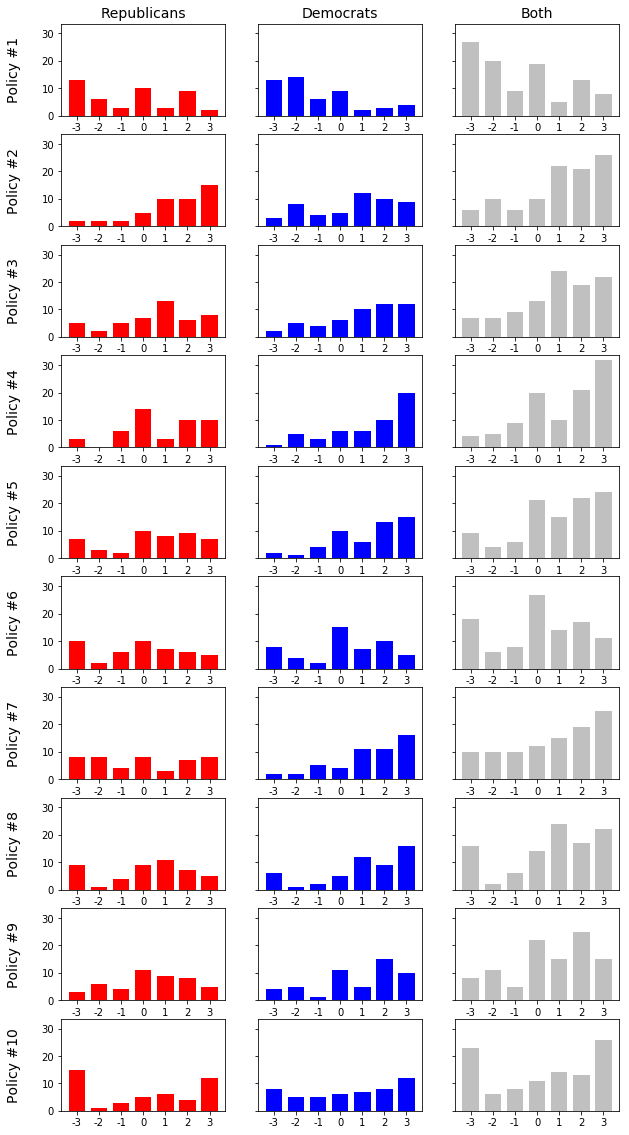

In [235]:
#Generate histogram distributions of each policy position, where x-axis = agree choice
r_data = policy_data[policy_data['ptyid'] == 'r']
d_data = policy_data[policy_data['ptyid'] == 'd']

fig, axarr = plt.subplots(10,3,sharey=True)
fig.set_size_inches(10,20)

for start,finish in [(0,10),(10,20),(20,30),(30,40),(40,50)]:
    for i,polcol in enumerate(response_cols[start:finish]):
        axarr[i,0].hist(r_data[polcol], bins=[-3,-2,-1,0,1,2,3,4], align='left', rwidth=.75, color='r')
        axarr[i,1].hist(d_data[polcol], bins=[-3,-2,-1,0,1,2,3,4], align='left', rwidth=.75, color='b')
        axarr[i,2].hist(policy_data[polcol], bins=[-3,-2,-1,0,1,2,3,4], align='left', rwidth=.75, color='silver')

        for j in range(3):
            axarr[i,j].set_xticks(np.arange(-3,4))
            axarr[i,j].set_xticklabels(np.arange(-3,4))

        axarr[i,0].set_ylabel('Policy #' + str(i+1+start)  + '\n', size=14)

    axarr[0,0].set_title('Republicans', size=14)
    axarr[0,1].set_title('Democrats', size=14)
    axarr[0,2].set_title('Both', size=14)

    fig.savefig('policy_party_hist_visual_'+ str(start) + '_' + str(finish) + '.png', dpi=600)

# Generate CSV for Michael

In [333]:
#Re-generate correlation matrix 
corr_data = pd.DataFrame([pearsonr(policy_data['polid'],policy_data[col])[0] for col in response_cols],
                                 columns=['pearsonr'])
corr_data = corr_data.join(pd.DataFrame([spearmanr(policy_data['polid'],policy_data[col])[0] for col in response_cols],
                                 columns=['spearmanr']))
corr_data.index = response_cols

#Combine mean & std dfs (Copied from previous code, excuse the ugliness)
csv_data = party_means.copy()
csv_data.columns = ['all_mean','rep_mean','dem_mean']
csv_data = csv_data.join(party_std.copy())
csv_data.columns = ['all_mean','rep_mean','dem_mean'] + ['all_std','rep_std','dem_std']

#Combine the correlation matrix and calculate errors
new_csv_data = csv_data.iloc[1:].join(corr_data)[['all_mean','all_std','spearmanr']]
new_csv_data['all_std'] = new_csv_data['all_std']/(len(policy_data)**0.5) #Turn std into standard error
new_csv_data['spearmanr_se'] = [0] * len(new_csv_data) #Generate SE of estimate column (filled in next cell)
new_csv_data = new_csv_data.reset_index()
new_csv_data.columns = ['name','mean','se_mean','spearmanr','se_estimate']

new_csv_data

,name,mean,se_mean,spearmanr,se_estimate
0,p1support,-0.955882,0.226080,-0.191034,0
1,p2support,1.000000,0.225659,-0.210208,0
2,p3support,0.750000,0.231777,0.131035,0
3,p4support,1.220588,0.201885,0.143709,0
4,p5support,0.852941,0.236362,0.187409,0
5,p6support,-0.117647,0.236607,0.041544,0
6,p7support,0.691176,0.248134,0.335111,0
7,p8support,0.735294,0.237615,0.235341,0
8,p9support,0.573529,0.229819,0.213373,0
9,p10support,0.191176,0.279735,0.171627,0


In [331]:
#Get SE of estimate
from scipy.stats import rankdata
from scipy.stats import linregress

id_data = rankdata(policy_data['polid'],'dense')
for i,col in enumerate(new_csv_data['name']):
    policy = rankdata(policy_data[col],'dense')
    new_csv_data.loc[i,'se_estimate'] = linregress(id_data,policy)[4]
    
#Save as .csv
new_csv_data.to_csv('policy_pretest_summary_data_68_rightACQandtime.csv')
new_csv_data

,name,mean,se_mean,spearmanr,se_estimate
0,p1support,-0.955882,0.226080,-0.191034,0.175073
1,p2support,1.000000,0.225659,-0.210208,0.175087
2,p3support,0.750000,0.231777,0.131035,0.183164
3,p4support,1.220588,0.201885,0.143709,0.159413
4,p5support,0.852941,0.236362,0.187409,0.183572
5,p6support,-0.117647,0.236607,0.041544,0.188055
6,p7support,0.691176,0.248134,0.335111,0.184260
7,p8support,0.735294,0.237615,0.235341,0.183162
8,p9support,0.573529,0.229819,0.213373,0.178470
9,p10support,0.191176,0.279735,0.171627,0.219227
